In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

data = pd.read_csv('Titanic-Dataset.csv')
print(data.head())
print(data.describe())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


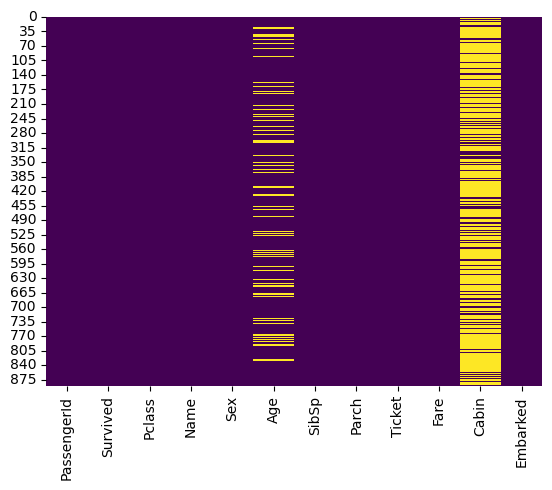

In [20]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()


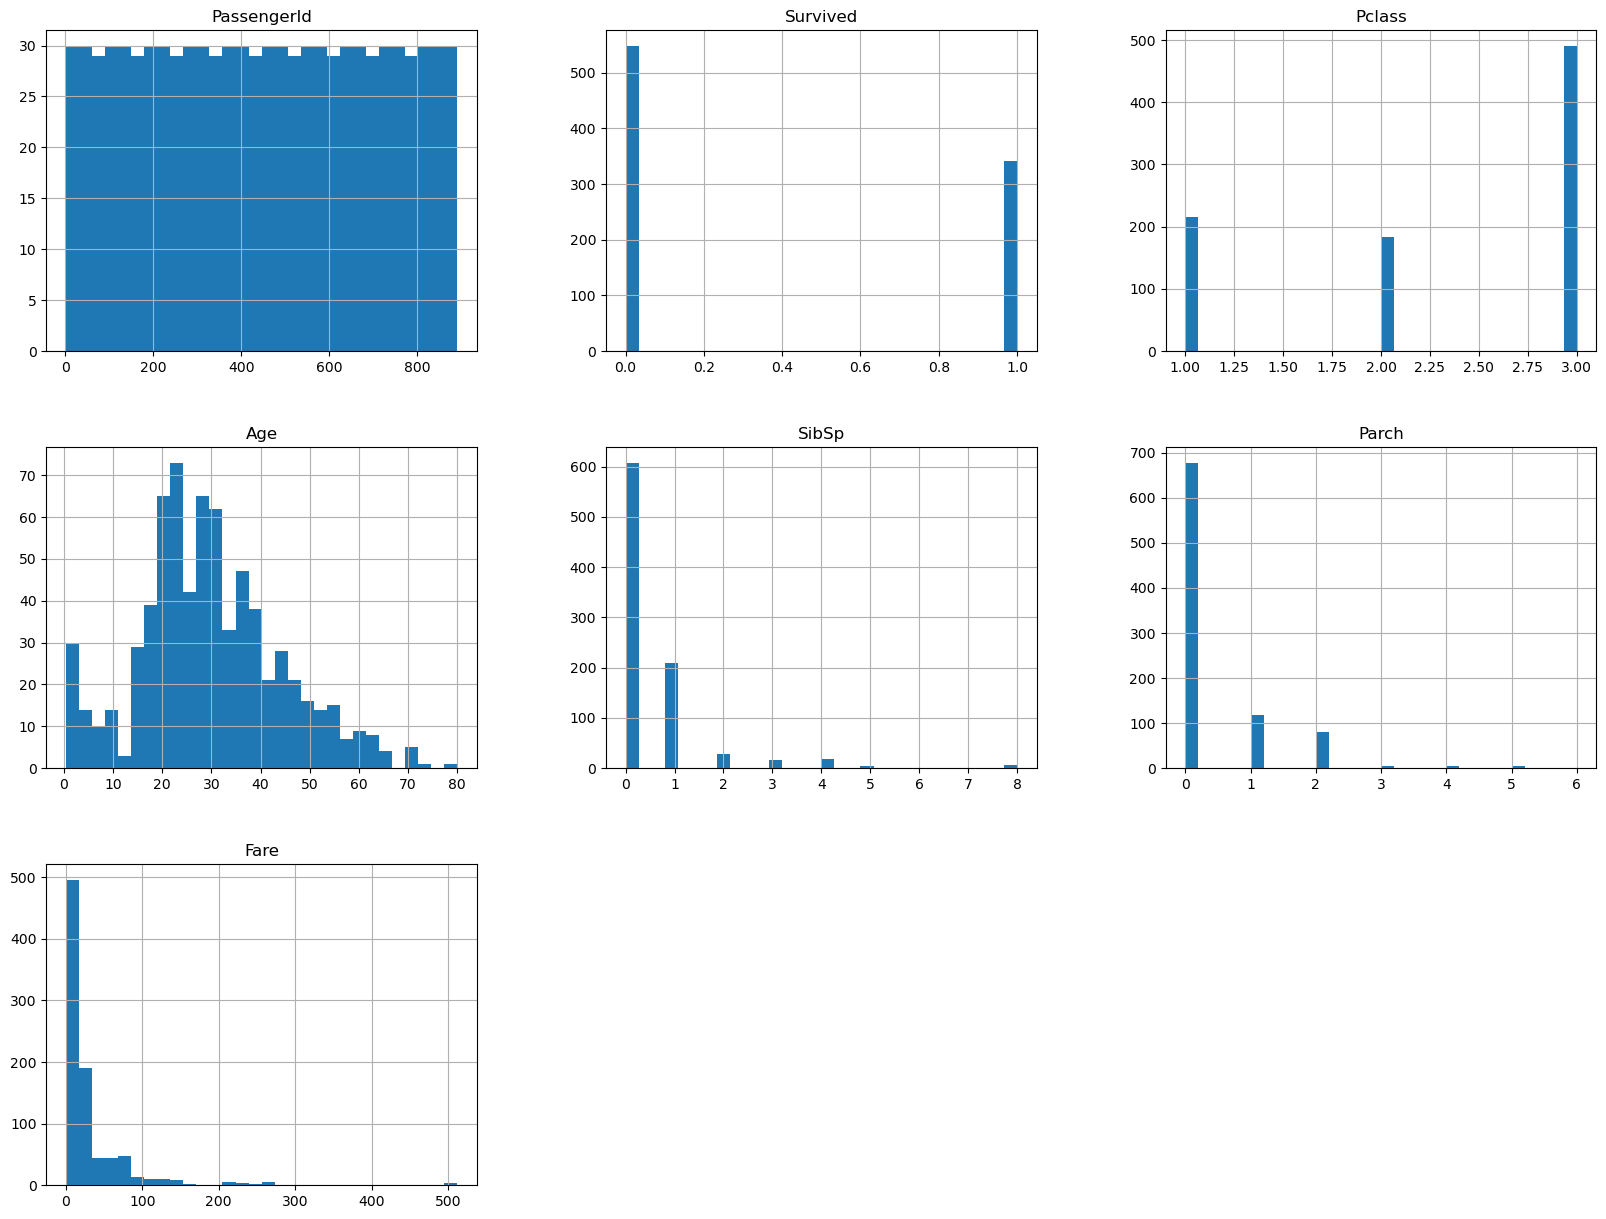

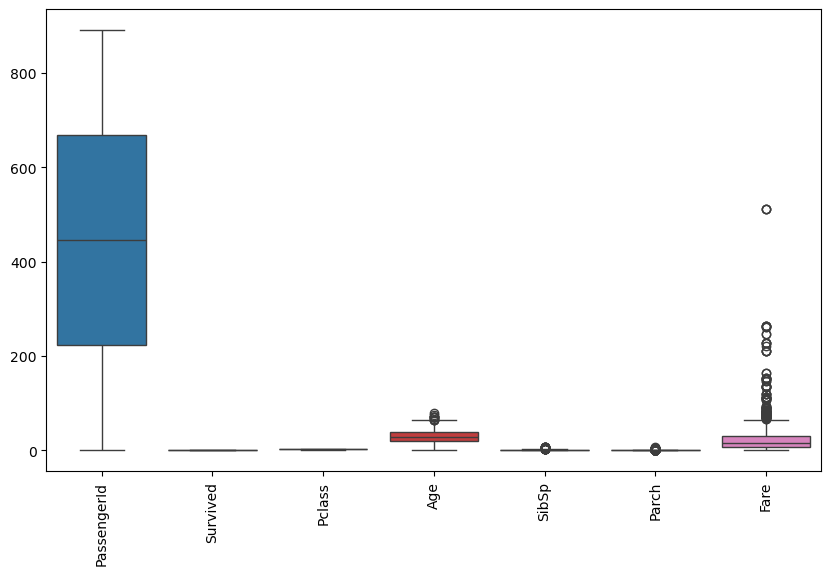

In [22]:
# Histograma para variables numéricas
data.hist(bins=30, figsize=(20,15))
plt.show()

# Gráfico de cajas para detectar valores atípicos
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


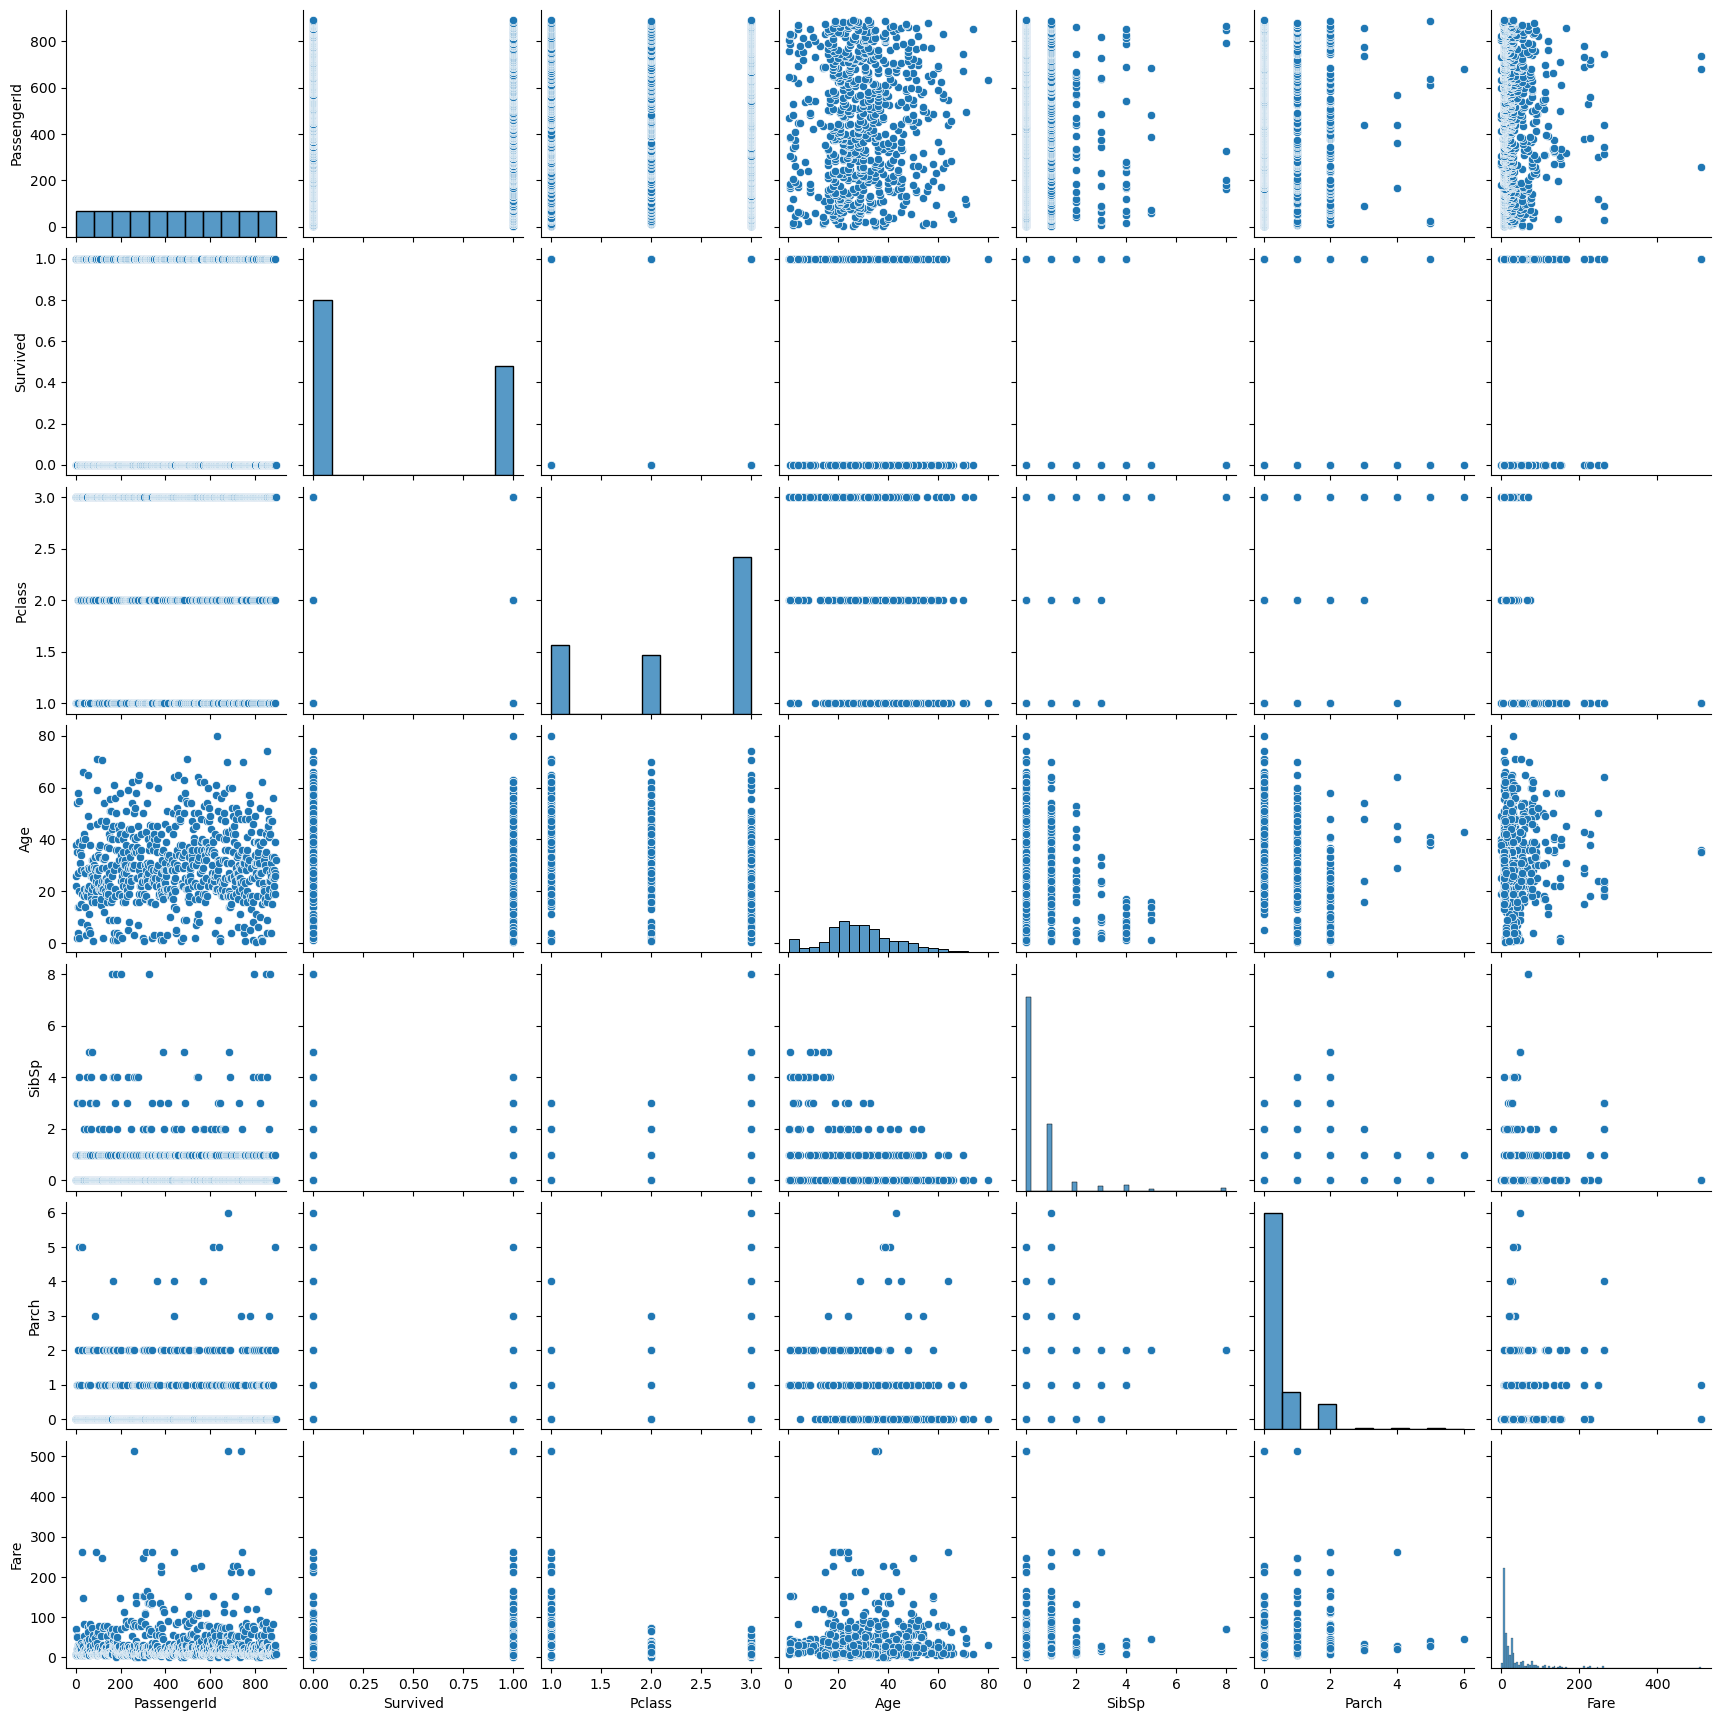

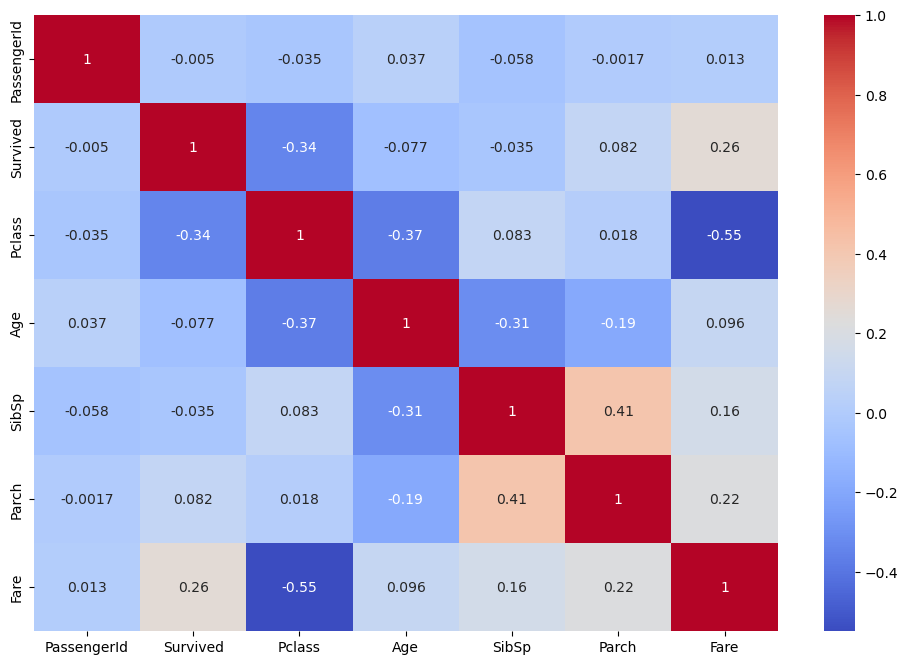

In [26]:
sns.pairplot(data)
plt.show()

plt.figure(figsize=(12,8))
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


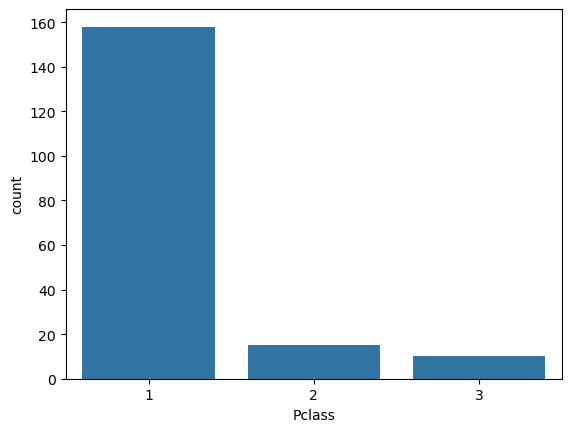

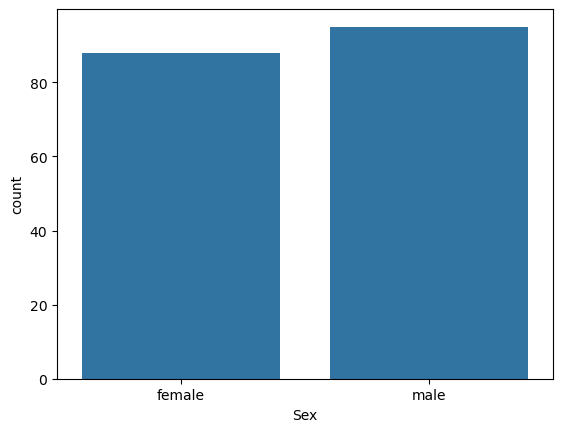

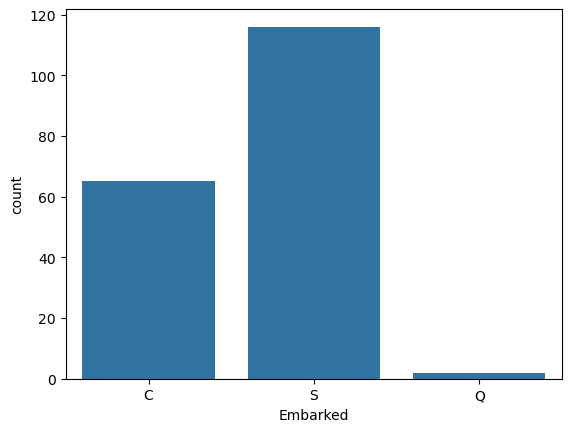

In [43]:
categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    sns.countplot(data=data, x=feature)
    plt.show()


In [92]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket'], errors='ignore')
print(data.head())


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [96]:
print(data['Embarked'].dtype)
print(data['Embarked'].unique())


object
['S' 'C' 'Q' nan]


In [121]:
# Eliminar filas donde 'Embarked' tiene valores nulos
data = data.dropna(subset=['Embarked'])

# Verificar que se eliminaron las filas
print(data['Embarked'].isnull().sum())  # Debería ser 0


0


In [194]:

# Tratar valores faltantes en variables categóricas
cat_imputer = SimpleImputer(strategy='most_frequent')  
data['Embarked'] = cat_imputer.fit_transform(data[['Embarked']]).ravel() 


# Codificar variables categóricas como 'Sex' y 'Embarked'
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Convierte 'male'/'female' a 0/1
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])  # Convierte 'S', 'C', 'Q' a valores numéricos

# Escalar características numéricas
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Verificación
print(data.isnull().sum())  # Verificar si hay más valores nulos
print(data.head())  # Ver las primeras filas del dataset para verificar la transformación



Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         0       3    1 -0.565736      1      0 -0.502445         2
1         1       1    0  0.663861      1      0  0.786845         0
2         1       3    0 -0.258337      0      0 -0.488854         2
3         1       1    0  0.433312      1      0  0.420730         2
4         0       3    1  0.433312      0      0 -0.486337         2


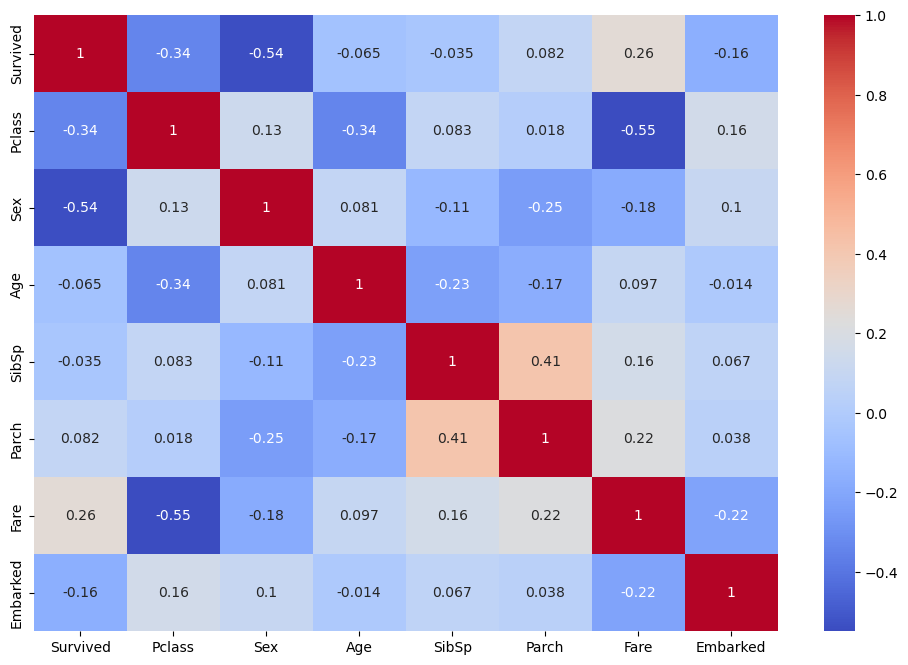

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Embarked   -0.163517
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64


In [146]:


# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Seleccionar características con alta correlación con la variable objetivo
correlation_target = correlation_matrix["Survived"].sort_values(ascending=False)
print(correlation_target)




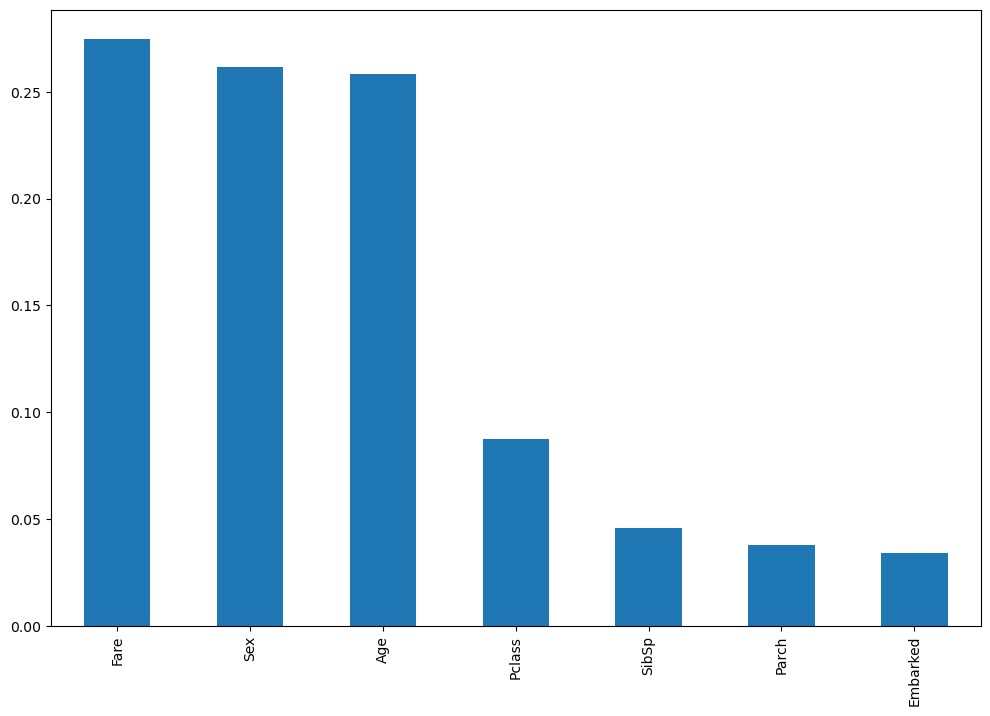

In [148]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Definir las variables predictoras y la variable objetivo
X = data.drop(columns=['Survived'])
y = data['Survived']

# Entrenar el modelo
model.fit(X, y)

# Obtener la importancia de las características
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12,8))
feature_importances.plot(kind='bar')
plt.show()


In [150]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Definir el modelo
model = LogisticRegression(max_iter=1000)

# Realizar RFE
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

# Resumen de la selección
print("Selected Features: %s" % (X.columns[fit.support_]))
print("Feature Ranking: %s" % (fit.ranking_))


Selected Features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked'], dtype='object')
Feature Ranking: [1 1 1 1 3 2 1]


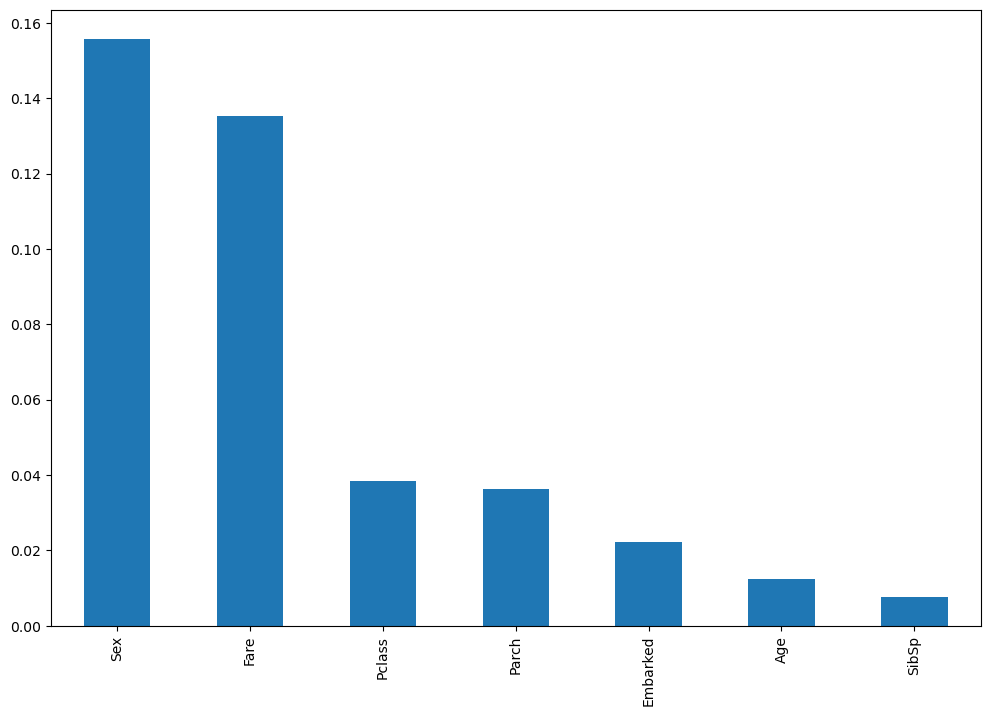

In [152]:
from sklearn.feature_selection import mutual_info_classif

# Calcular la información mutua
mutual_info = mutual_info_classif(X, y)

# Ordenar las características por información mutua
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Visualizar la información mutua de las características
plt.figure(figsize=(12,8))
mutual_info_series.plot(kind='bar')
plt.show()


In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir y entrenar el modelo con hiperparámetros iniciales
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=100)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)  # Ahora la función está importada
print(f'Precisión: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusión:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Reporte de Clasificación:\n{class_report}')

# Ajustar hiperparámetros y volver a entrenar
model = LogisticRegression(penalty='l1', C=0.5, solver='liblinear', max_iter=100)
model.fit(X_train, y_train)

# Evaluar nuevamente
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Nueva Precisión: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Nueva Matriz de Confusión:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Nuevo Reporte de Clasificación:\n{class_report}')




Precisión: 0.7932960893854749
Matriz de Confusión:
[[90 15]
 [22 52]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Nueva Precisión: 0.7932960893854749
Nueva Matriz de Confusión:
[[89 16]
 [21 53]]
Nuevo Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [177]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar las métricas individuales
print(f'Precisión: {accuracy}')
print(f'Precisión (clase 0): {precision_score(y_test, y_pred, pos_label=0)}')
print(f'Precisión (clase 1): {precision_score(y_test, y_pred, pos_label=1)}')
print(f'Recall (clase 0): {recall_score(y_test, y_pred, pos_label=0)}')
print(f'Recall (clase 1): {recall_score(y_test, y_pred, pos_label=1)}')
print(f'F1-score: {f1}')
print(f'F1-score (clase 0): {f1_score(y_test, y_pred, pos_label=0)}')
print(f'F1-score (clase 1): {f1_score(y_test, y_pred, pos_label=1)}')

# Mostrar el reporte completo de clasificación
print('\nReporte de Clasificación:')
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nMatriz de Confusión:\n{conf_matrix}')


Precisión: 0.7932960893854749
Precisión (clase 0): 0.8090909090909091
Precisión (clase 1): 0.7681159420289855
Recall (clase 0): 0.8476190476190476
Recall (clase 1): 0.7162162162162162
F1-score: 0.7412587412587412
F1-score (clase 0): 0.827906976744186
F1-score (clase 1): 0.7412587412587412

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Matriz de Confusión:
[[89 16]
 [21 53]]


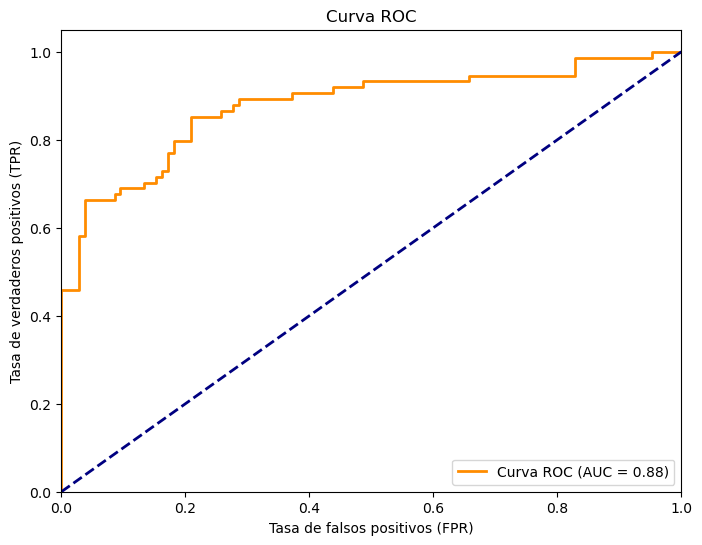

In [179]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de la clase positiva
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


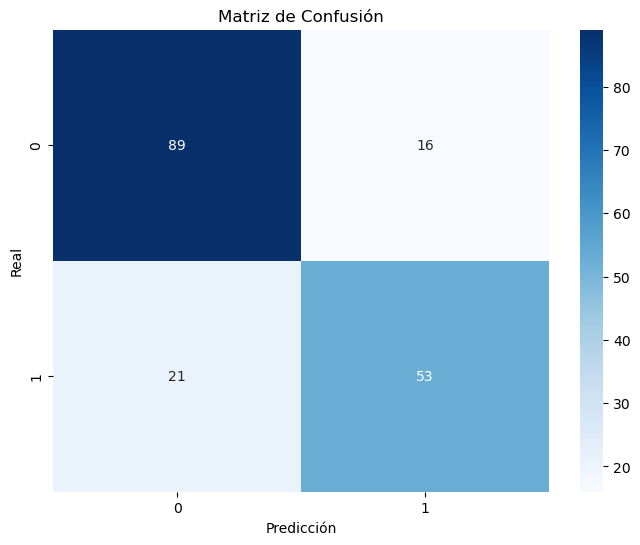

In [181]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


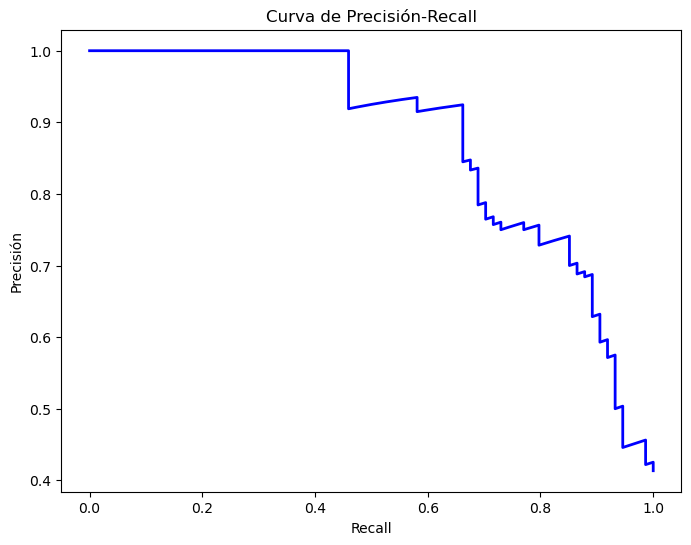

In [183]:
from sklearn.metrics import precision_recall_curve

# Calcular la curva de Precisión-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Graficar la curva de Precisión-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall')
plt.show()


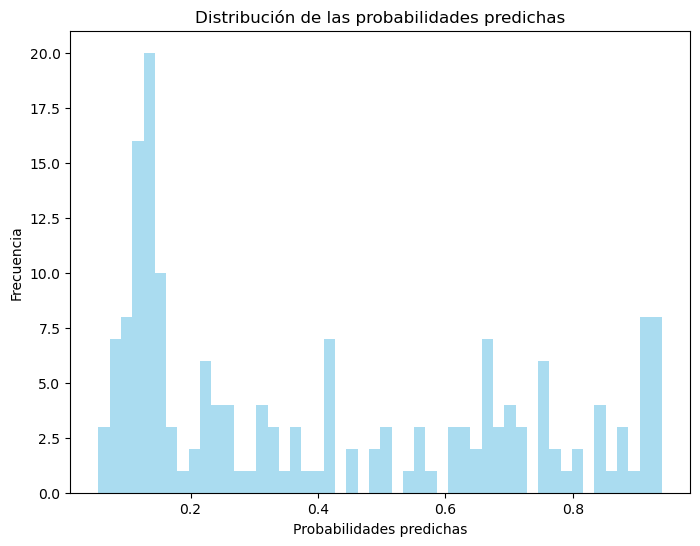

In [185]:
# Graficar el histograma de las predicciones
plt.figure(figsize=(8, 6))
plt.hist(y_probs, bins=50, color='skyblue', alpha=0.7)
plt.xlabel('Probabilidades predichas')
plt.ylabel('Frecuencia')
plt.title('Distribución de las probabilidades predichas')
plt.show()


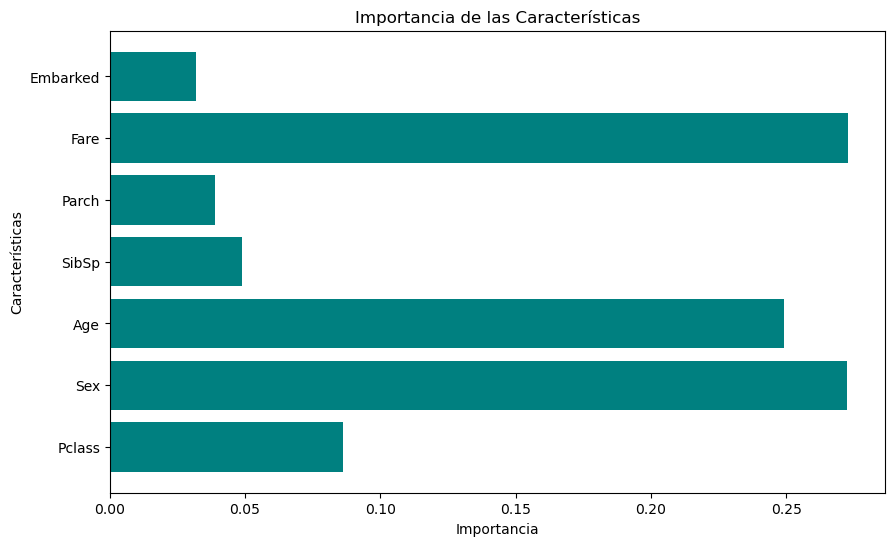

In [187]:
# Para un modelo RandomForest
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo RandomForest (como ejemplo)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances, color='teal')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.show()
